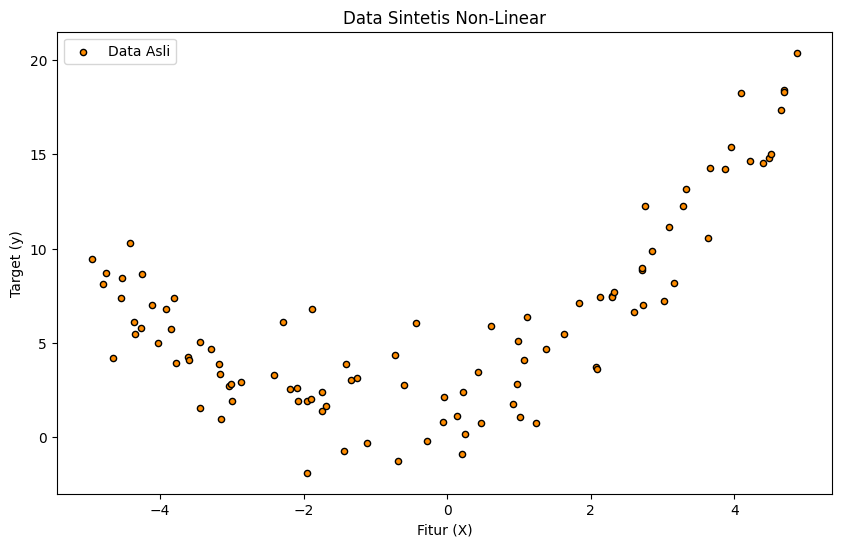

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Membuat Data Sintetis Non-Linear
np.random.seed(42) # Agar hasil bisa direproduksi
X = np.sort(np.random.rand(100, 1) * 10 - 5, axis=0) # 100 titik data antara -5 dan 5
# Contoh fungsi kuadratik dengan noise
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) * 2
# y = np.sin(X).ravel() + np.random.randn(100) * 0.1 # Alternatif: fungsi sinus dengan noise

# Reshape y jika perlu (beberapa model lebih suka 1D array)
y = y.ravel()

# Plot data asli
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("Data Sintetis Non-Linear")
plt.legend()
plt.show()

# Siapkan data untuk plotting garis prediksi
X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1) # Titik-titik halus untuk plot kurva

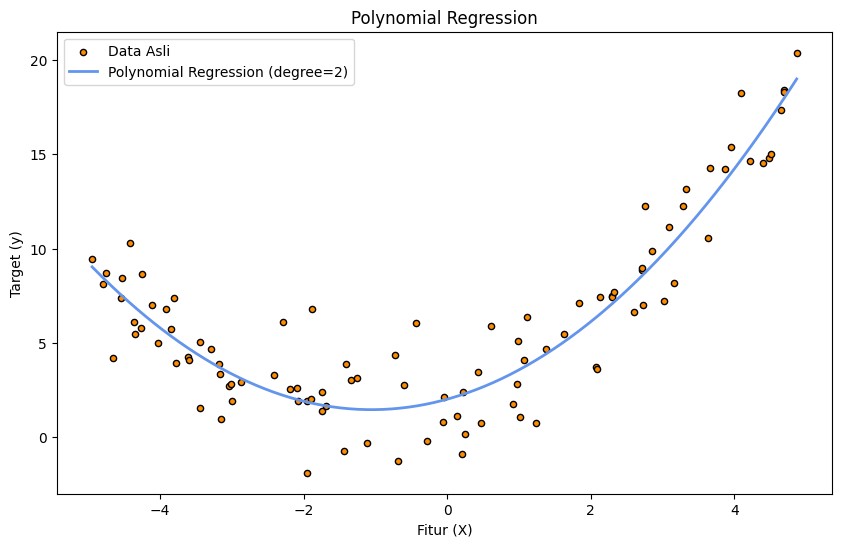

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Derajat polinomial (misal: 2 untuk kuadratik, 3 untuk kubik, dst.)
degree = 2

# Membuat pipeline: 1. Tambah fitur polinomial, 2. Terapkan regresi linear
poly_reg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Melatih model
poly_reg_model.fit(X, y)

# Membuat prediksi
y_poly_pred = poly_reg_model.predict(X_plot)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.plot(X_plot, y_poly_pred, color="cornflowerblue", linewidth=2, label=f"Polynomial Regression (degree={degree})")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

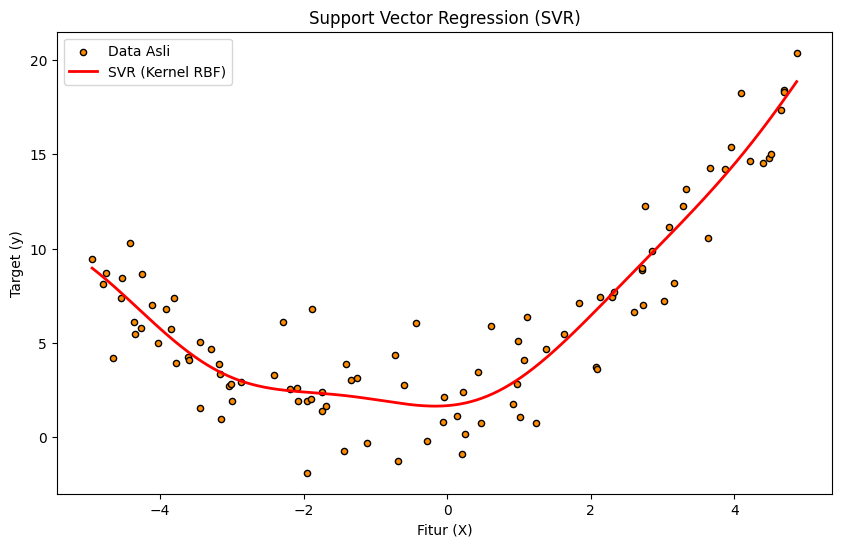

In [3]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler # SVR sensitif terhadap skala fitur

# Penting: SVR seringkali bekerja lebih baik dengan data yang diskalakan
# Kita skala X dan y
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_x.fit_transform(X)
# y perlu di reshape ke 2D untuk scaler, lalu kembali ke 1D untuk SVR fit
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Inisialisasi model SVR dengan kernel RBF (umum digunakan untuk non-linear)
# C: Parameter regulasi. Semakin besar C, semakin kecil toleransi error.
# epsilon: Menentukan margin di mana tidak ada penalti yang terkait dengan error.
svr_model = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1) # gamma='scale' adalah default yang baik

# Melatih model pada data yang diskalakan
svr_model.fit(X_scaled, y_scaled)

# Membuat prediksi (pada X_plot yang juga diskalakan)
X_plot_scaled = scaler_x.transform(X_plot)
y_svr_pred_scaled = svr_model.predict(X_plot_scaled)

# Mengembalikan prediksi ke skala asli
y_svr_pred = scaler_y.inverse_transform(y_svr_pred_scaled.reshape(-1, 1))

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.plot(X_plot, y_svr_pred, color="red", linewidth=2, label="SVR (Kernel RBF)")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("Support Vector Regression (SVR)")
plt.legend()
plt.show()

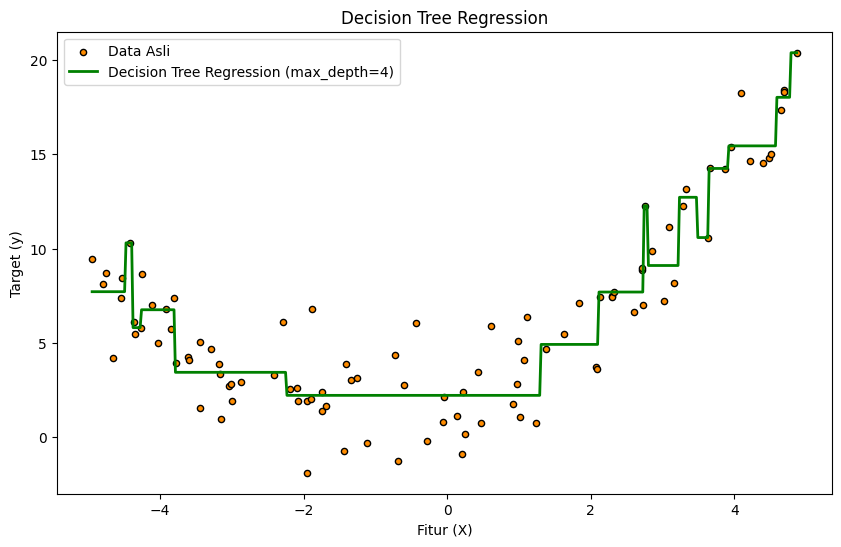

In [4]:
from sklearn.tree import DecisionTreeRegressor

# Inisialisasi model Decision Tree
# max_depth: Mengontrol kedalaman pohon (membatasi kompleksitas, mencegah overfitting)
# min_samples_leaf: Jumlah minimum sampel di daun pohon
tree_reg_model = DecisionTreeRegressor(max_depth=4, random_state=42) # Coba ubah max_depth

# Melatih model
tree_reg_model.fit(X, y)

# Membuat prediksi
y_tree_pred = tree_reg_model.predict(X_plot)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.plot(X_plot, y_tree_pred, color="green", linewidth=2, label=f"Decision Tree Regression (max_depth={tree_reg_model.max_depth})")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

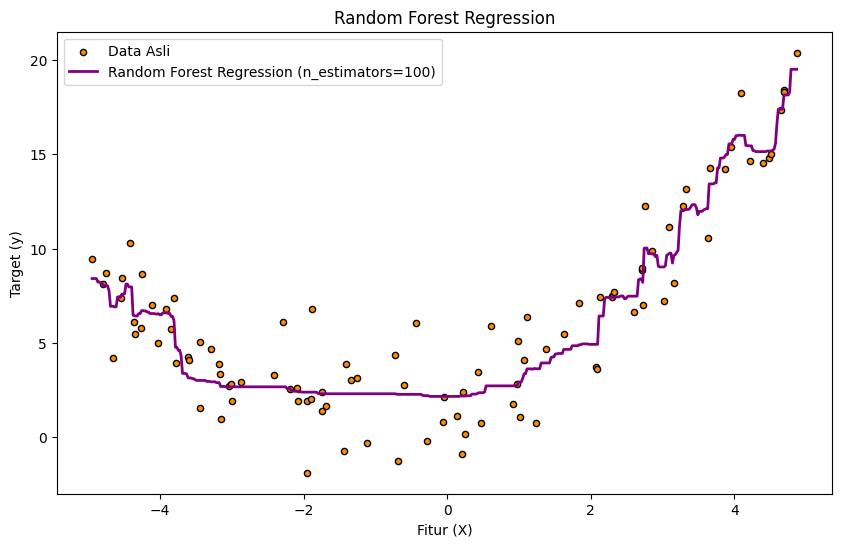

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Inisialisasi model Random Forest
# n_estimators: Jumlah pohon dalam forest
# max_depth, min_samples_leaf: Sama seperti Decision Tree, tapi berlaku untuk tiap pohon
# random_state: Untuk reproduktifitas
rf_reg_model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42, n_jobs=-1) # n_jobs=-1 gunakan semua core CPU

# Melatih model
rf_reg_model.fit(X, y)

# Membuat prediksi
y_rf_pred = rf_reg_model.predict(X_plot)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.plot(X_plot, y_rf_pred, color="purple", linewidth=2, label=f"Random Forest Regression (n_estimators={rf_reg_model.n_estimators})")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

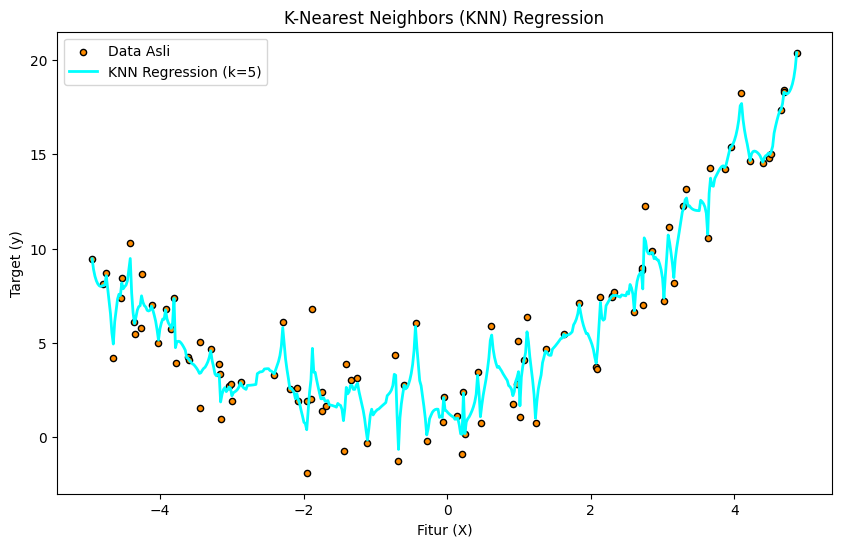

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler # KNN sensitif terhadap skala fitur

# Scaling fitur (X) penting untuk KNN karena berbasis jarak
scaler_x_knn = StandardScaler()
X_scaled_knn = scaler_x_knn.fit_transform(X)
X_plot_scaled_knn = scaler_x_knn.transform(X_plot)

# Inisialisasi model KNN Regressor
# n_neighbors (k): Jumlah tetangga yang dipertimbangkan
# weights: 'uniform' (semua tetangga bobot sama) atau 'distance' (tetangga lebih dekat bobot lebih besar)
n_neighbors = 5
knn_reg_model = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance')

# Melatih model (KNN tidak benar-benar 'melatih' dalam arti tradisional, ia hanya menyimpan data)
# Menggunakan X yang sudah diskalakan, tapi y tetap asli
knn_reg_model.fit(X_scaled_knn, y)

# Membuat prediksi pada X_plot yang diskalakan
y_knn_pred = knn_reg_model.predict(X_plot_scaled_knn)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.plot(X_plot, y_knn_pred, color="cyan", linewidth=2, label=f"KNN Regression (k={n_neighbors})")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("K-Nearest Neighbors (KNN) Regression")
plt.legend()
plt.show()

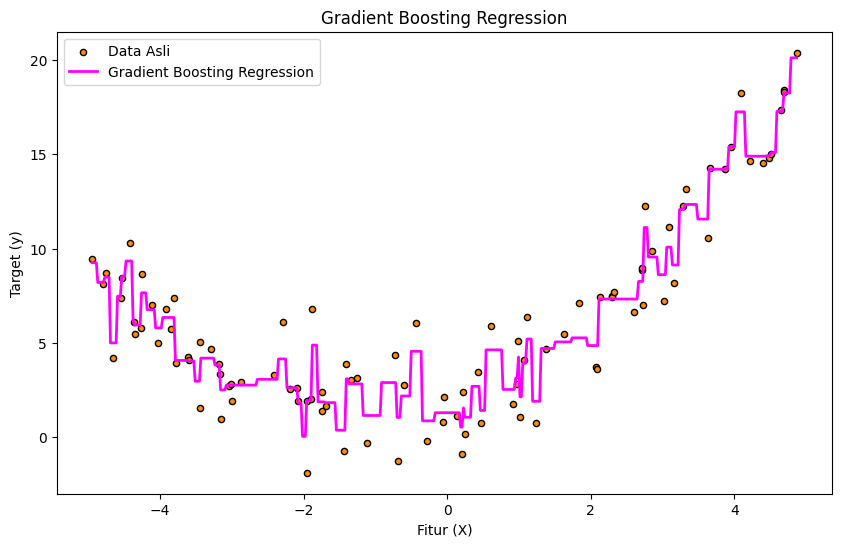

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi model Gradient Boosting Regressor
# n_estimators: Jumlah pohon (tahapan boosting)
# learning_rate: Mengecilkan kontribusi setiap pohon (membantu mencegah overfitting)
# max_depth: Kedalaman maksimum setiap pohon regresi individu
# loss: Fungsi loss yang dioptimalkan ('ls' untuk least squares adalah default)
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model
gbr_model.fit(X, y)

# Membuat prediksi
y_gbr_pred = gbr_model.predict(X_plot)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Data Asli")
plt.plot(X_plot, y_gbr_pred, color="magenta", linewidth=2, label=f"Gradient Boosting Regression")
plt.xlabel("Fitur (X)")
plt.ylabel("Target (y)")
plt.title("Gradient Boosting Regression")
plt.legend()
plt.show()